<center>
<img src="https://umdrightnow.umd.edu/sites/umdrightnow.umd.edu/files/image2.png" alt="UMD Banner">
<!-- <img src="https://ireap.umd.edu/losertlab/MURI/images/pic03.png" alt="UMD Logo" height="300" width="300"> -->
<h1 style=\"font-size:36px;\">UMD Budget Analysis</h1>
<h4>Adharsh Babu, Karthik Krishnan, Uday Warier</h4>

<hr>
<center><h1>Introduction &amp; Importing the Data</h1></center>
<body><p>
The University of Maryland at College Park (UMD) is a flagship university at Maryland and is one of the top universities in computer science. We decided to take a look into their annual budget and salary reports to find any trends. In our project, we have pulled data from multiple sources for our analysis. Each source has it's own dataframe and has been retrieved in it's own unique way. Therefore, in the below descriptions, each dataframe has a link that links to a IPython notebook file that contains the steps required to produce that dataframe. All the data was pulled from either <a href="http://otcads.umd.edu/bfa/budgetinfo3.htm">the Department of Budget and Fiscal Analaysis</a> or <a href="https://salaryguide.dbknews.com/">UMD's salary guide</a>. Each dataframe will be described below with a short description and a graph describing it's contents. 

We have written this project in Python 3 and have used a number of libraries including: <a href="https://pandas.pydata.org/pandas-docs/stable/">pandas</a>, <a href="https://docs.scipy.org/doc/numpy/user/">numpy</a>, <a href="https://matplotlib.org/contents.html">matplotlib</a>, <a href="http://scikit-learn.org/stable/documentation.html">scikit-learn</a>, and <a href=https://www.crummy.com/software/BeautifulSoup/>Beautiful Soup</a>. 

</body></p>

In [1]:
# Required dependencies for this project

import requests
import pandas as pd
from bs4 import BeautifulSoup
import pickle
import plotly.express as px
import numpy as np
import copy

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
from matplotlib.pyplot import cm

All the dataframes used in this project are in the below dataframes.

In [64]:
expenses = pd.read_pickle('df/expenses')
revenue = pd.read_pickle('df/revenue')
salary_increases = pd.read_pickle('df/salary_increases')
tuition_fees = pd.read_pickle('df/tuition_fees')
salaries = pd.read_pickle('df/salaries')

Below are some functions used to render plots.

In [3]:
def plot_line_graphs_tuition(tuition_fees, features, title, figsize):
    plt.style.use('seaborn-whitegrid')
    _, ax = fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
    color=iter(cm.rainbow(np.linspace(0, 1, len(features))))
    for feature in features:
        c = next(color)
        plt.plot(tuition_fees['Year'], tuition_fees[feature], marker='', linewidth=5, alpha=0.9, label=feature, c=c)

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    ax.tick_params(axis='both', which='major', pad=30)

    plt.title(title, fontsize=70, pad=20)
    plt.xlabel("Year", fontsize=50, labelpad=20)
    plt.ylabel("$ in Dollars", fontsize=50, labelpad=20)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
    plt.show()

In [4]:
def plot_line_graphs_expenses(features, title, figsize):
    plt.style.use('seaborn-whitegrid')
    _, ax = fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
    color=iter(cm.rainbow(np.linspace(0, 1, len(features))))
    for feature in features:
        c = next(color)
        plt.plot(sorted(list(expenses['Year'].unique())), features[feature], marker='', linewidth=5, alpha=0.9, label=feature, c=c)

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    ax.tick_params(axis='both', which='major', pad=30)

    plt.title(title, fontsize=70, pad=20)
    plt.xlabel("Year", fontsize=50, labelpad=20)
    plt.ylabel("$ in Dollars", fontsize=50, labelpad=20)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
    plt.show()

In [5]:
def plot_line_graphs_revenue(features, title, figsize):
    plt.style.use('seaborn-whitegrid')
    _, ax = fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
    color=iter(cm.rainbow(np.linspace(0, 1, len(features))))
    for feature in features:
        c = next(color)
        plt.plot(sorted(list(revenue['Year'].unique())), features[feature], marker='', linewidth=5, alpha=0.9, label=feature, c=c)

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    ax.tick_params(axis='both', which='major', pad=30)

    plt.title(title, fontsize=70, pad=20)
    plt.xlabel("Year", fontsize=50, labelpad=20)
    plt.ylabel("$ in Dollars", fontsize=50, labelpad=20)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
    plt.show()

<hr>
<center><h1>Description and Analysis of Each DataFrame</h1></center>

# tuition_fees

The tuition_fees dataframe contains tuition rates for undergraduate, graduate, out-of-state, and in-state students over time. If you would like to learn more about how this dataframe was created, please click here: <a href="https://adharsh.github.io/Tuition_and_Fees.html">https://adharsh.github.io/Tuition_and_Fees.html</a>

In [6]:
tuition_fees

,Year,Standard Tuition Rates: Undergrad Resident,Standard Tuition Rates: Undergrad Non-Resident,Standard Tuition Rates: Undergrad Part-Time Resident (fee per credit hour),Standard Tuition Rates: Undergrad Part-Time Non-Resident (fee per credit hour),Standard Tuition Rates: Graduate Resident (fee per credit hour),Standard Tuition Rates: Graduate Non-Resident (fee per credit hour),Mandatory Fees: Undergrad Full-Time,Mandatory Fees: Undergrad Part-Time,Mandatory Fees: Graduate Full-Time,Mandatory Fees: Graduate Part-Time
0,2010,6566,22503,273,938,471,1016,1487,678,1188,675
1,2011,6763,23178,282,966,500,1077,1653,761,1351,757
2,2012,6966,24337,290,1014,525,1131,1689,779,1383,773
3,2013,7175,25554,299,1065,551,1188,1733,799,1413,788
4,2014,7390,26576,308,1108,573,1236,1771,818,1446,806
5,2015,7764,27905,324,1163,602,1298,1815,840,1490,829
6,2016,8152,29300,340,1221,632,1363,1844,855,1521,846
7,2017,8315,30179,346,1258,651,1404,1866,866,1538,855
8,2018,8481,31688,353,1321,683,1474,1918,893,1590,881
9,2019,8651,33272,360,1387,717,1548,1944,906,1620,898


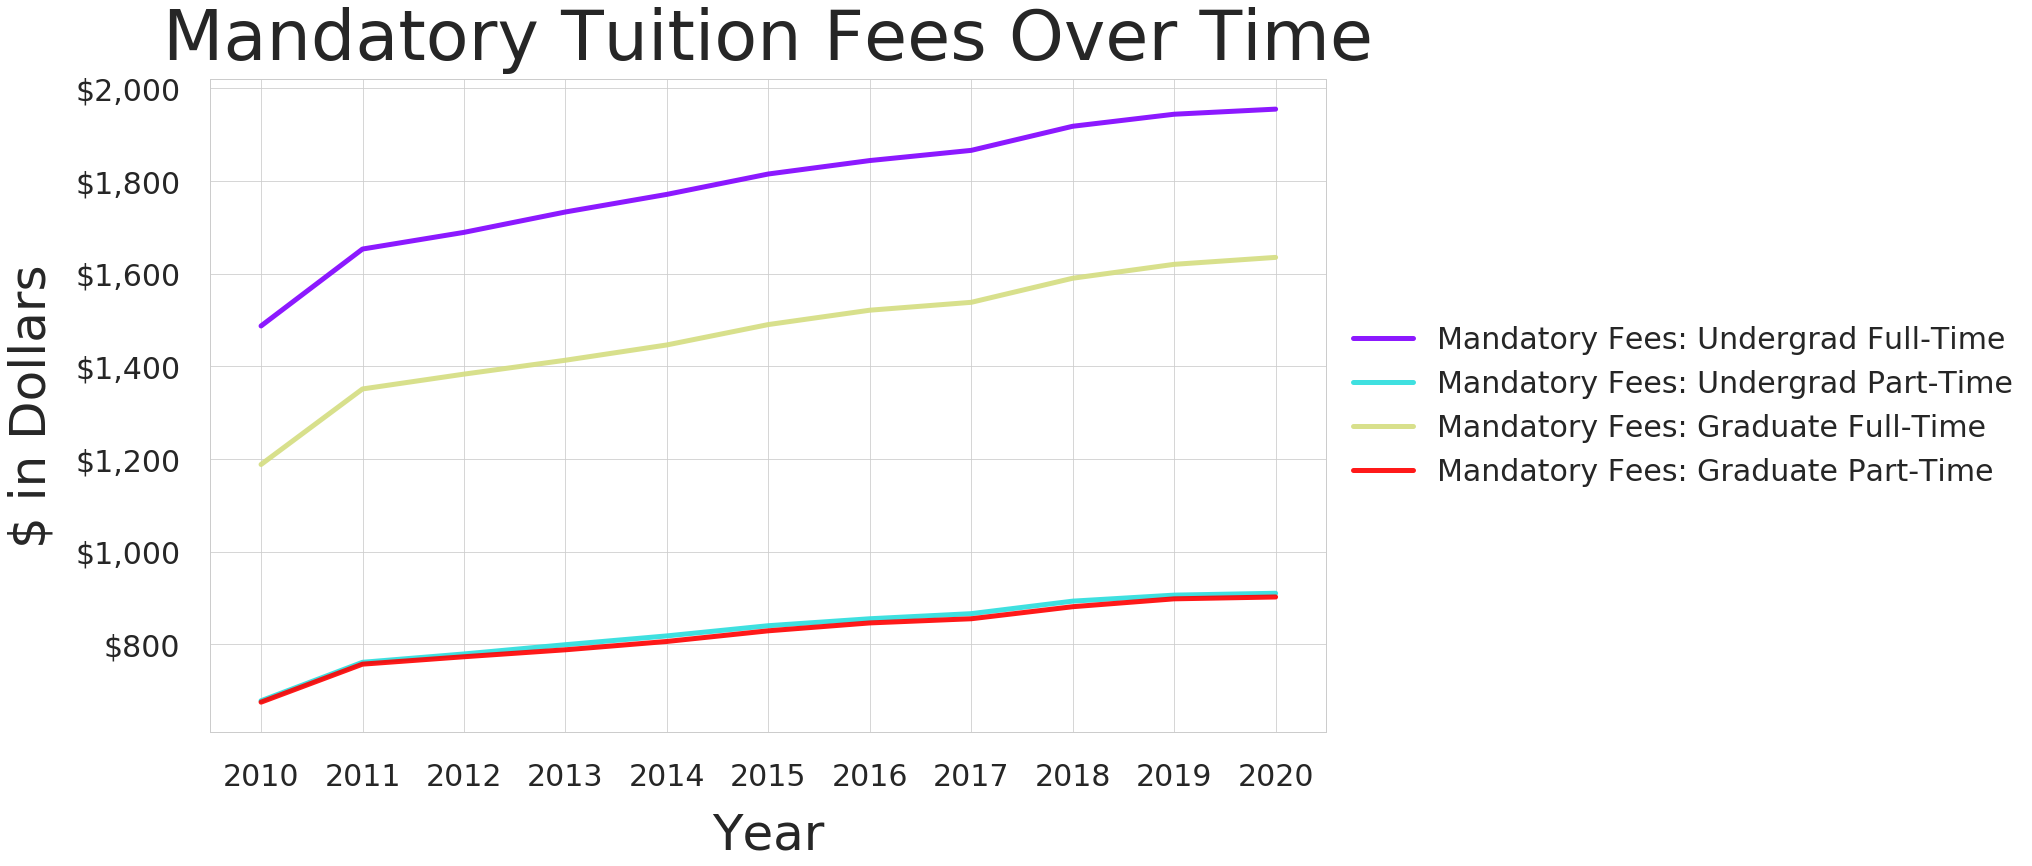

In [7]:
figsize = (20, 12)
title = "Mandatory Tuition Fees Over Time"
features = list(tuition_fees.columns)[7:11]
plot_line_graphs_tuition(tuition_fees, features, title, figsize)

From the above graph, it seems like full-time students pay the most money in terms of mandatory fees (which makes sense) of which undergrads pay significantly more. There is a big variation from how much the undergraduate and graduate students pay when studying full-time than when they study part-time. For part-time students, it looks like they pay basically the same amount.

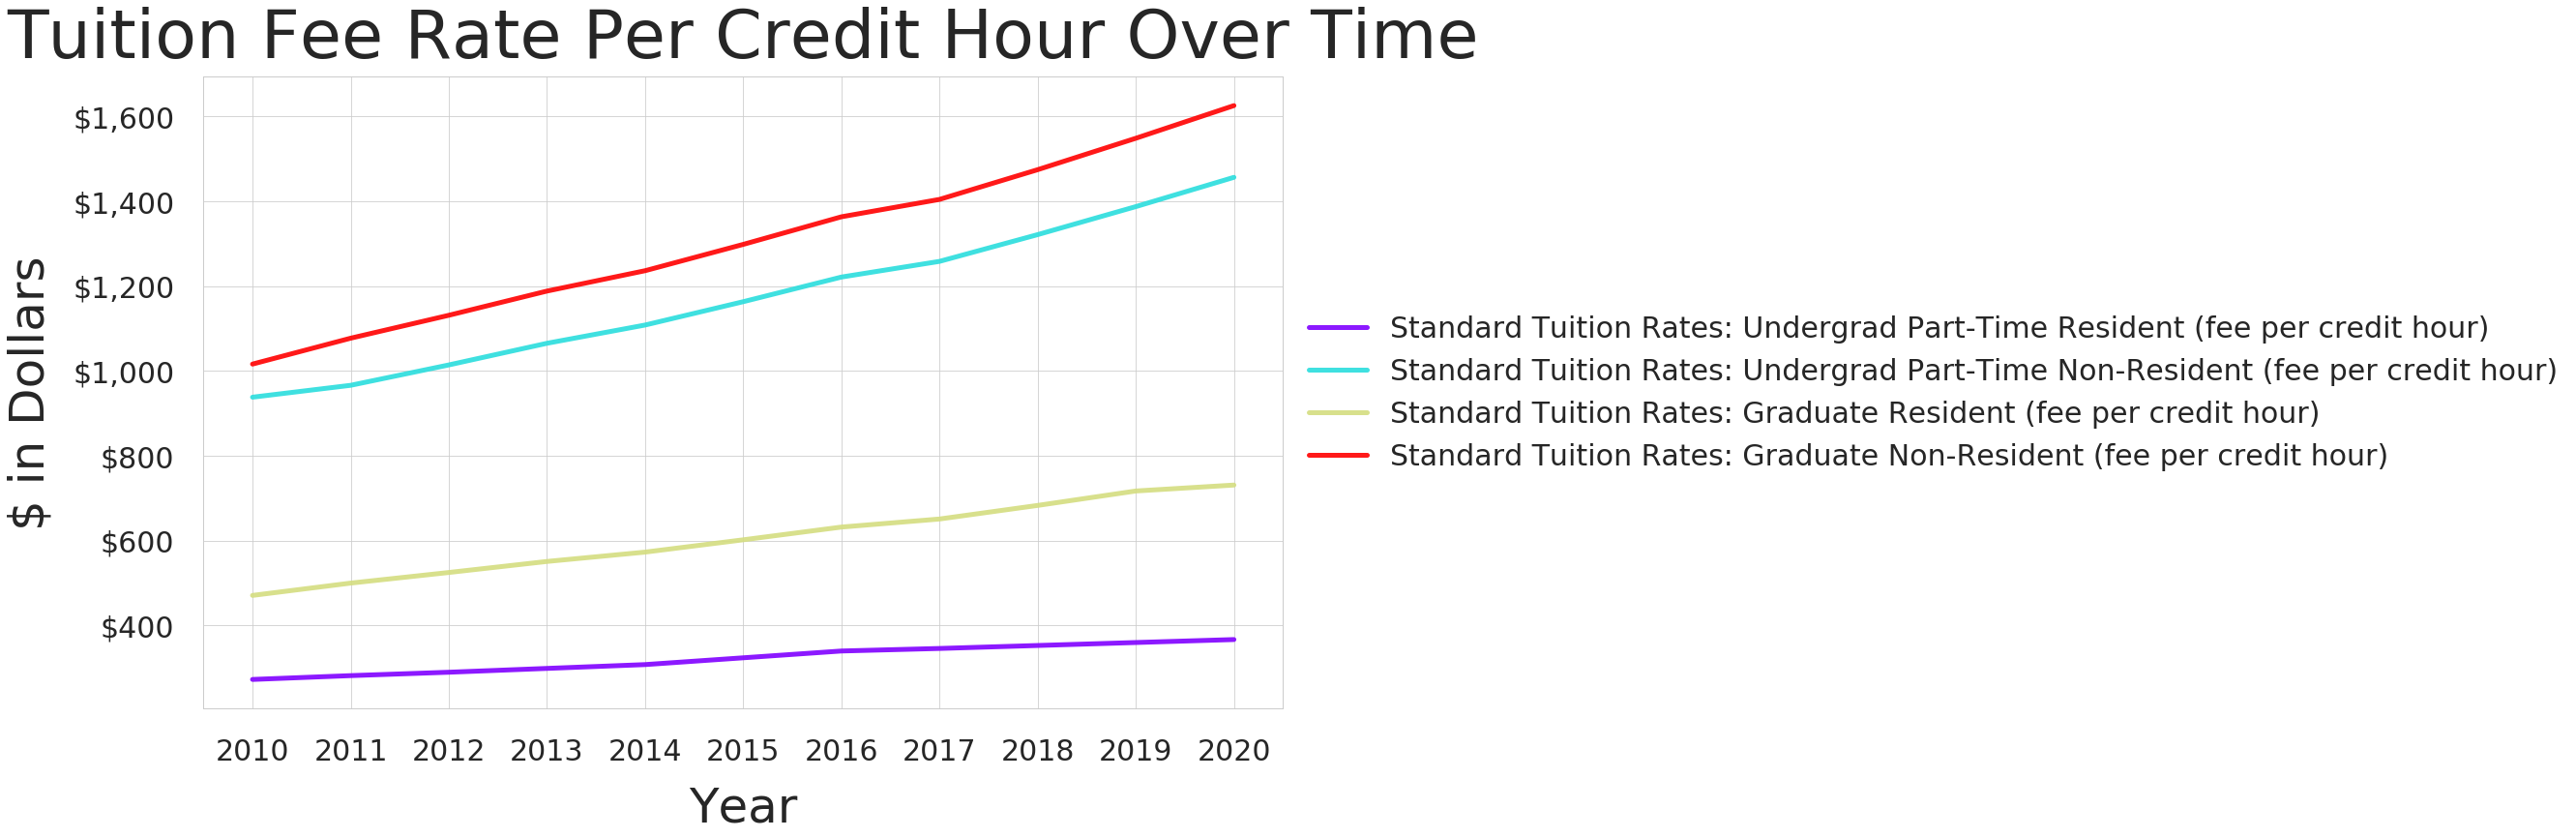

In [8]:
figsize = (20, 12)
title = "Tuition Fee Rate Per Credit Hour Over Time"
features = list(tuition_fees.columns)[3:7]
plot_line_graphs_tuition(tuition_fees, features, title, figsize)

This graph is very interesting as it shows how the university charges in-state and out-of-state students. Out-of-state students get charged substantially more, and over time, you can see that the university keeps charging them more and more. In-state students' tuitions have increased at a much smaller rate. In-state and out-of-state graduate students pay signifcantly more than undergraduate students, which makes sense since graduate programs are considerd "cash cow" programs for the university.

# expenses

The expenses dataframe contains data on how the university spends it's money by category and department. If you would like to learn more about how this dataframe was created, please click here: <a href="https://adharsh.github.io/Expenses.html">https://adharsh.github.io/Expenses.html</a>

In [9]:
expenses

,Year,Group Type,Group,Total Expenditure Amount
0,2020,Program,Research,4.956594e+08
1,2020,Program,Total Expenditures,2.252275e+09
2,2020,Program,Instruction,5.988685e+08
3,2020,Program,Public Service,9.758716e+07
4,2020,Program,Academic Support,2.172755e+08
...,...,...,...,...
157,2012,Category,"Fixed Charges, Debt Service, Rentals & Contracts",2.314603e+08
158,2012,Category,Land & Structures,4.789373e+07
159,2012,Category,Travel & Communication,4.567409e+07
160,2012,Category,Total Expenditures,1.687959e+09


Each expense has a 'Group Type'. For each 'Group Type', there is a list of 'Group' data.

In [10]:
expenses.groupby(by=['Group Type', 'Group']).count()

Year  \
Group Type Group                                                    
Category   Equipment & Supplies & Vehicle Operation             9   
           Fixed Charges, Debt Service, Rentals & Contracts     9   
           Fuel & Utilities                                     9   
           Grants (Scholarships & Remissions)                   9   
           Land & Structures                                    9   
           Salaries & Fringes                                   9   
           Total Expenditures                                   9   
           Travel & Communication                               9   
Program    Academic Support                                     9   
           Auxiliary Enterprises                                9   
           Institutional Support                                9   
           Instruction                                          9   
           Plant Operations                                     9   
           Public Service                                       9   
           Research                                             9   
           Scholarships & Fellowships                           9   
           Student Services                                     9   
           Total Expenditures                                   9   

                                                             Total Expenditure Amount  
Group Type Group                                                                       
Category   Equipment & Supplies & Vehicle Operation                                 9  
           Fixed Charges, Debt Service, Rentals & Contracts                         9  
           Fuel & Utilities                                                         9  
           Grants (Scholarships & Remissions)                                       9  
           Land & Structures                                                        9  
           Salaries & Fringes                                                       9  
           Total Expenditures                                                       9  
           Travel & Communication                                                   9  
Program    Academic Support                                                         9  
           Auxiliary Enterprises                                                    9  
           Institutional Support                                                    9  
           Instruction                                                              9  
           Plant Operations                                                         9  
           Public Service                                                           9  
           Research                                                                 9  
           Scholarships & Fellowships                                               9  
           Student Services                                                         9  
           Total Expenditures                                                       9

As shown above, expenses can be split by 'Program' or 'Category'. Both 'Program' and 'Category' have a 'Total Expenditures' attribute. This is the sum of all the other attributes in that group, and the 'Total Expenditures' for a 'Program' and a 'Category' in a given year will be equal to each other. They're just two different ways of partitioning the expenses and they both sum to the same total expenses. 'Total Expenditure Amount' is not the same as 'Total Expenditures'. 'Total Expenditure Amount' is simply the amount of money spent in a particular group. There are nine unique values for the year column as shown above since this dataset ranges from 2012 to 2020.

In [11]:
# The groups unique to Category:
expenses.loc[expenses['Group Type'] == 'Category']['Group'].unique()

array(['Salaries & Fringes', 'Grants (Scholarships & Remissions)',
       'Fuel & Utilities', 'Equipment & Supplies & Vehicle Operation',
       'Fixed Charges, Debt Service, Rentals & Contracts',
       'Land & Structures', 'Travel & Communication',
       'Total Expenditures'], dtype=object)

In [12]:
# The groups unique to Program:
expenses.loc[expenses['Group Type'] == 'Program']['Group'].unique()

array(['Research', 'Total Expenditures', 'Instruction', 'Public Service',
       'Academic Support', 'Student Services', 'Institutional Support',
       'Auxiliary Enterprises', 'Scholarships & Fellowships',
       'Plant Operations'], dtype=object)

The below code was written to set up the following graphs:

In [13]:
group_list = expenses['Group'].unique()
features_array = []
for feature in group_list:
    features_array.append(expenses.loc[expenses['Group'] == feature].sort_values(by='Year', ascending=True)['Total Expenditure Amount'].values)

In [14]:
orig_features = dict(zip(group_list, features_array))
features = copy.deepcopy(orig_features)
del features['Total Expenditures']

In [15]:
total_expenditures = expenses.loc[(expenses['Group Type'] == 'Category') & (expenses['Group'] == 'Total Expenditures')].sort_values(by='Year', ascending=True)['Total Expenditure Amount'].values

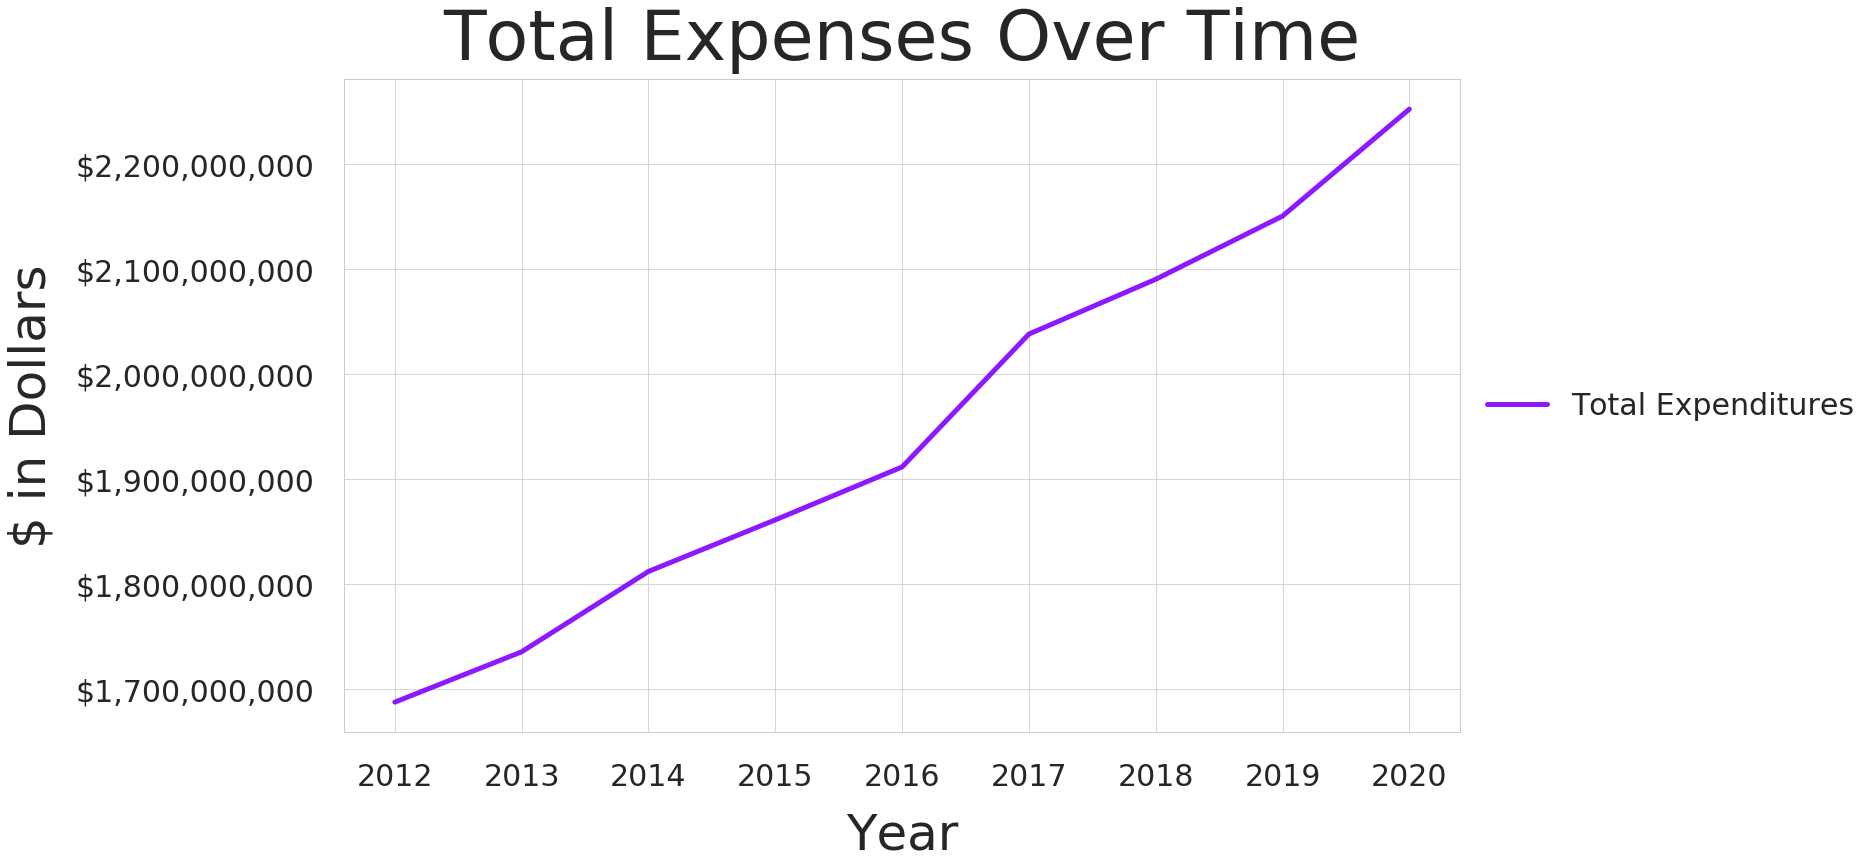

In [16]:
figsize = (20, 12)
title = "Total Expenses Over Time"
plot_line_graphs_expenses({'Total Expenditures' : total_expenditures}, title, figsize)

It's interesting to see how UMD's has more than $\$2.2$ billion just in expenses. It makes you wonder how much revenue they make to counter this expense. This is answered below!

In [17]:
categories = list(expenses.loc[expenses['Group Type'] == 'Category']['Group'].unique())
del categories[categories.index('Total Expenditures')]

programs = list(expenses.loc[expenses['Group Type'] == 'Program']['Group'].unique())
del programs[programs.index('Total Expenditures')]

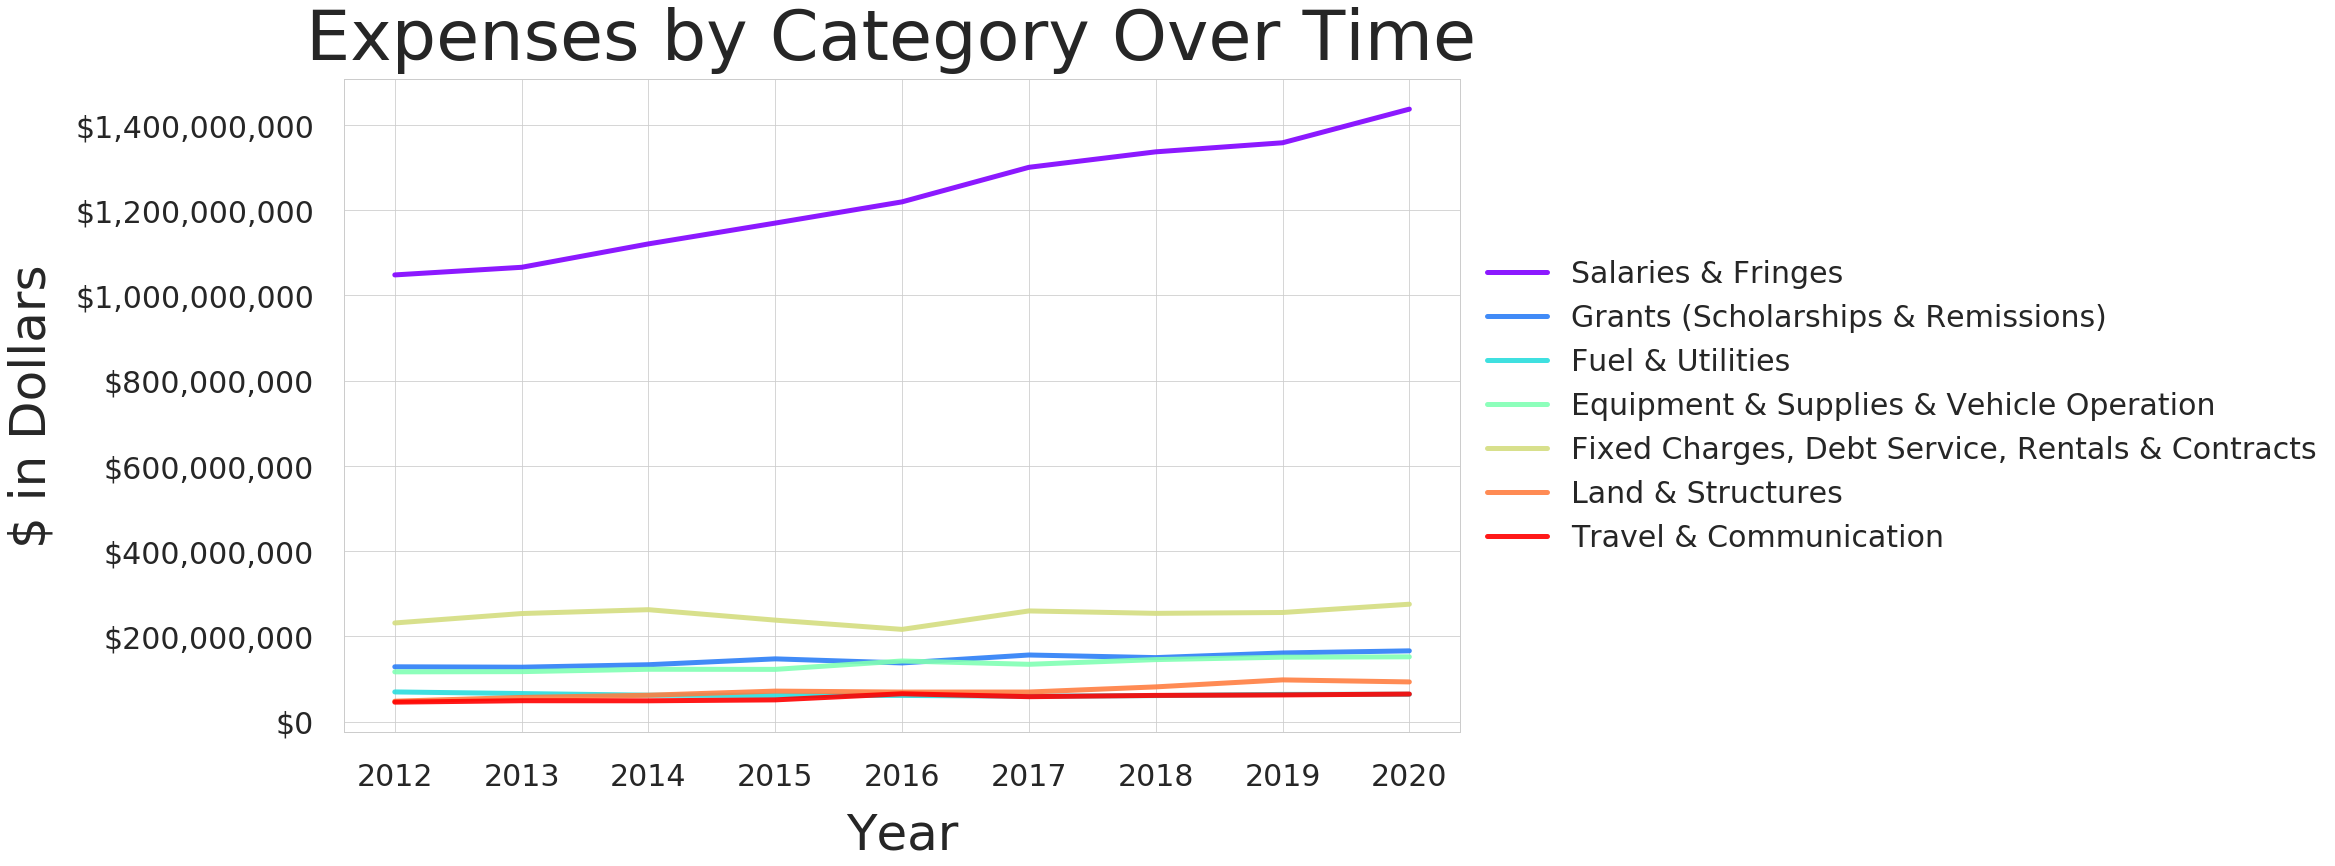

In [18]:
categories_dict = {k:orig_features[k] for k in orig_features if k in categories}

figsize = (20, 12)
title = "Expenses by Category Over Time "
plot_line_graphs_expenses(categories_dict, title, figsize)

By category, it seems that paying off Salaries & Fringes (benefits and other componesation) is the most expensive expense. After this, 'Fixed Charges, Debt Service, Rentals & Contracts' is the most costly expense for UMD. UMD is probably trying to reduce this expense out of all the expenses to maximize their net profit.

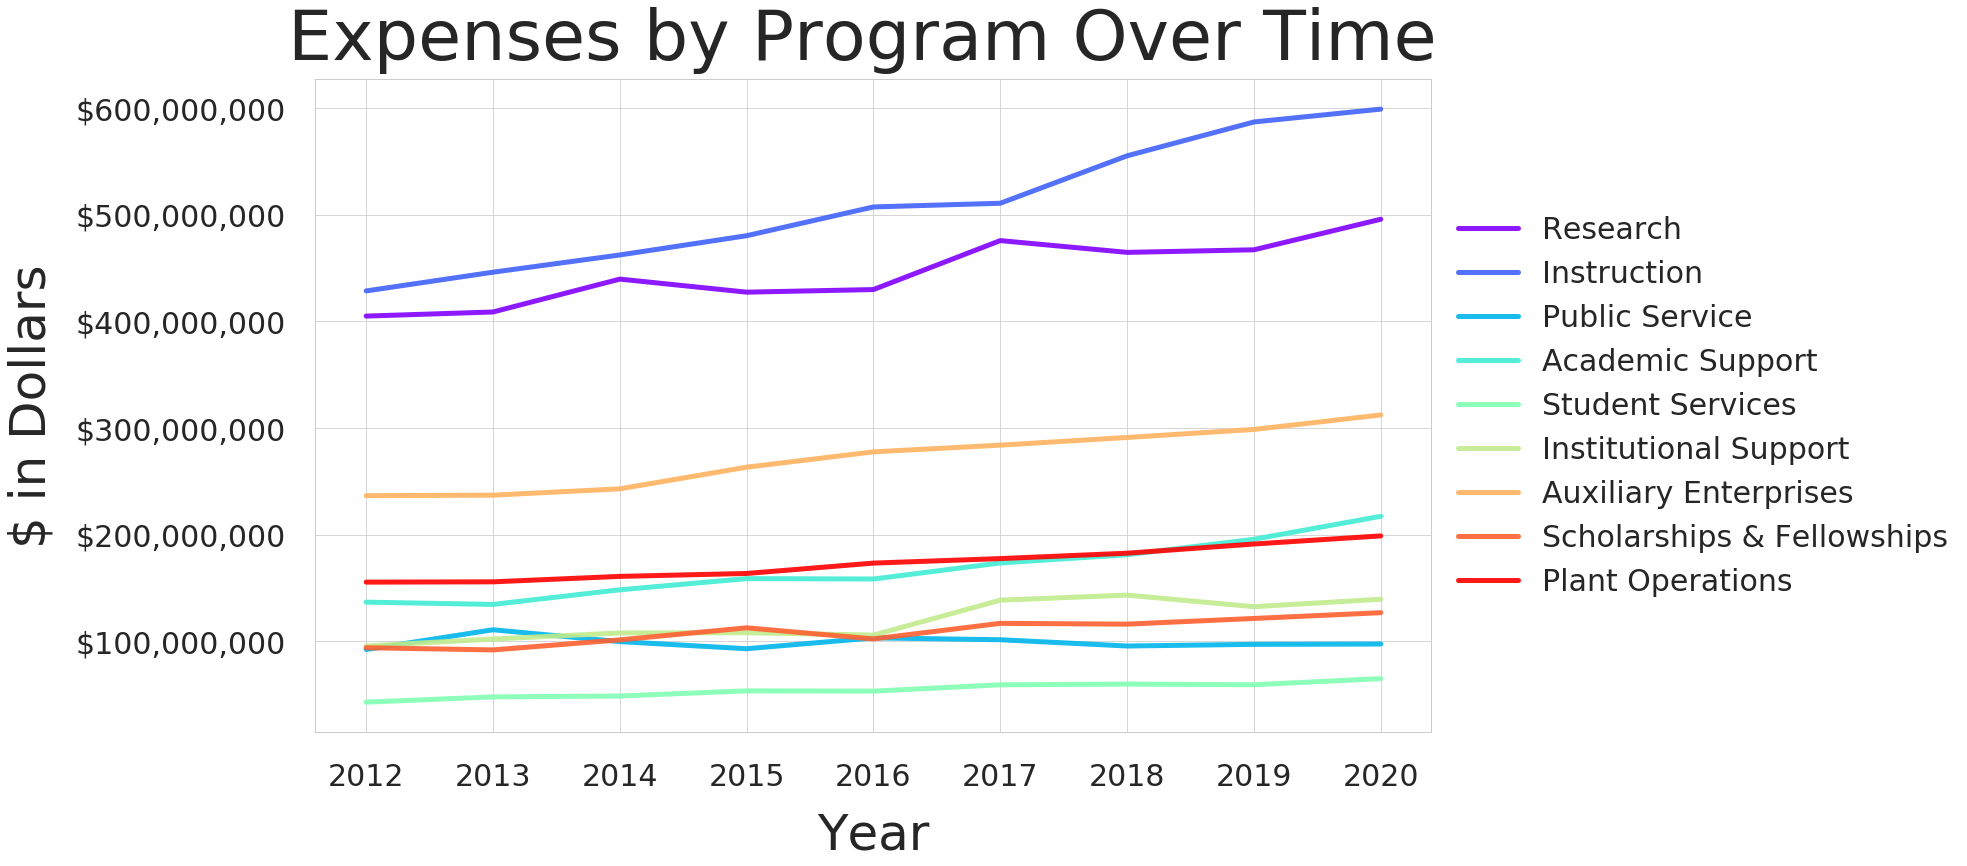

In [19]:
programs_dict = {k:orig_features[k] for k in orig_features if k in programs}

figsize = (20, 12)
title = "Expenses by Program Over Time "
plot_line_graphs_expenses(programs_dict, title, figsize)

When split by program, unsuprisingly, research and instruction are the most expensive expenses. This makes sense since UMD has a top-ranking computer science and physics department that both spend heavily on research. The 'Instruction' expense would probably be all the salaries of lecturers (not research professors) summed together.

# revenue

The revenue dataframe contains data on how the university gets it's money either through 'Unrestricted' or 'Restricted' means. If you would like to learn more about how this dataframe was created, please click here: <a href="https://adharsh.github.io/Revenue.html">https://adharsh.github.io/Revenue.html</a>

In [20]:
revenue

,Year,Restricted Type,Revenue Type,Amount,% of Total
0,2020,Unrestricted,Other Sources,6.084396e+07,2.7
1,2020,Total,Total Operating Budget,2.252275e+09,100.0
2,2020,Restricted,Total Restricted,4.644159e+08,20.6
3,2020,Restricted,State & Local Grants & Contracts,4.725433e+07,2.1
4,2020,Restricted,"Private Gifts, Grants & Contracts",8.740512e+07,3.9
...,...,...,...,...,...
103,2012,Restricted,Federal Grants & Contracts,3.001170e+08,17.8
104,2012,Restricted,State & Local Grants & Contracts,5.954007e+07,3.5
105,2012,Restricted,Total Restricted,4.139779e+08,24.5
106,2012,Total,Total Operating Budget,1.687959e+09,100.0


In [21]:
revenue.groupby(by=['Restricted Type', 'Revenue Type']).count()

Year  Amount  % of Total
Restricted Type Revenue Type                                                  
Restricted      Federal Grants & Contracts               9       9           9
                Private Gifts, Grants & Contracts        9       9           9
                State & Local Grants & Contracts         9       9           9
                Total Restricted                         9       9           9
Total           Total Operating Budget                   9       9           9
Unrestricted    Auxiliary Enterprises                    9       9           9
                Govt. & Private Gifts, Grants            9       9           9
                Other Sources                            9       9           9
                Sales & Services Of Educ. Activities     9       9           9
                State Appropriations                     9       9           9
                Total Unrestricted                       9       9           9
                Tuition And Fees                         9       9           9

Similar to expenses, revenue can be split by 'Unrestricted' or 'Restricted'. It can also be split by 'Total', and this occurs only once a year and contains the total revenue for that year and is the sum of both the 'Restricted' and 'Unrestricted' data for that year. This 'Total' only has one 'Revenue Type' called 'Total Operating Budget'. Each revenue type has an 'Amount' of money that is some percentage of the total money in that restricted type category. This percentage is described in '% of Total'. The total money in that restricted type category is a 'Revenue Type' called 'Total Restricted' or 'Total Unrestricted'. There are nine unique values for the year column as shown above since this dataset ranges from 2012 to 2020.

The code below was used to create the following revenue graphs:

In [22]:
total_revenue = revenue.loc[revenue['Revenue Type'] == 'Total Operating Budget'].sort_values(by='Year', ascending=True)['Amount'].values

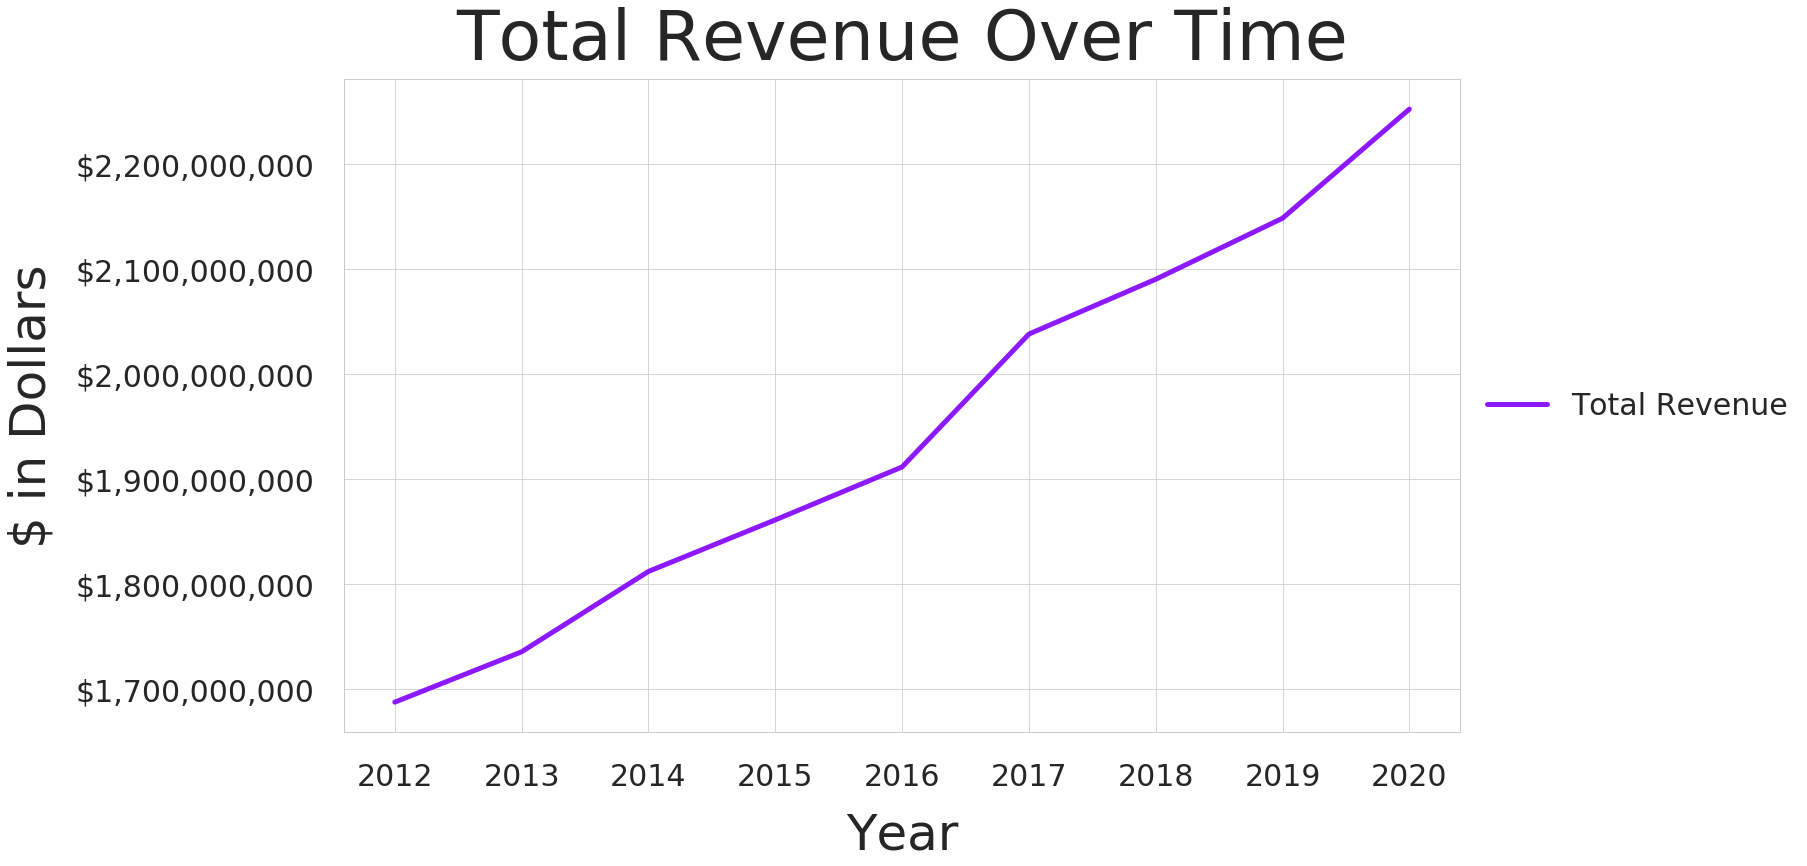

In [23]:
figsize = (20, 12)
title = "Total Revenue Over Time"
plot_line_graphs_expenses({'Total Revenue' : total_revenue}, title, figsize)

It's interesting to note how high the revenue is increasing. It also looks very similar to the expenses... (keep reading below!)

The code below will create revenue plots:

In [24]:
group_list = revenue['Revenue Type'].unique()
features_array = []
for feature in group_list:
    features_array.append(revenue.loc[revenue['Revenue Type'] == feature].sort_values(by='Year', ascending=True)['Amount'].values)

In [25]:
features = dict(zip(group_list, features_array))

In [26]:
unrestricted = list(revenue.loc[revenue['Restricted Type'] == 'Unrestricted']['Revenue Type'].unique())
restricted = list(revenue.loc[revenue['Restricted Type'] == 'Restricted']['Revenue Type'].unique())

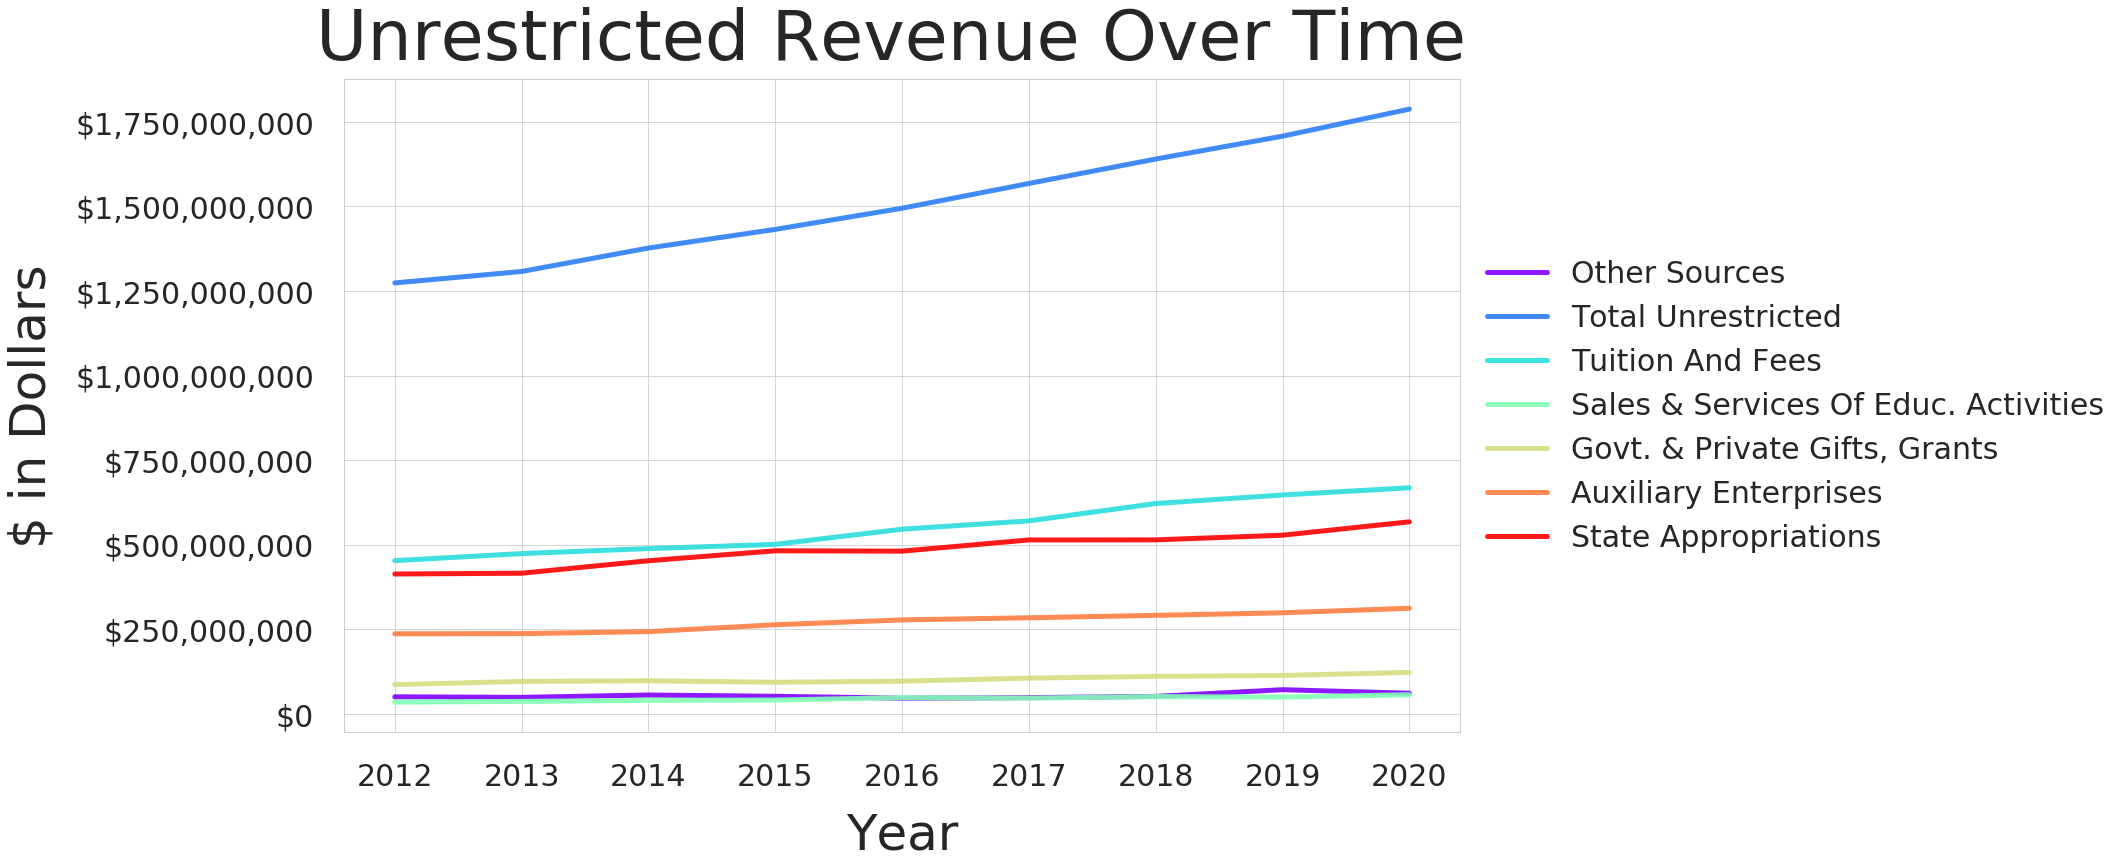

In [27]:
unrestricted_dict = {k:features[k] for k in unrestricted if k in features}

figsize = (20, 12)
title = "Unrestricted Revenue Over Time "
plot_line_graphs_expenses(unrestricted_dict, title, figsize)

In unrestricted revenue, it seems like the university get's most of it's money from tuition and fees as well as state appropriations (probably through taxes). They're both really similar so that that means that after summing all the money from every student paying their tuition, there is a nearly equal amount of money given from the government to the university.

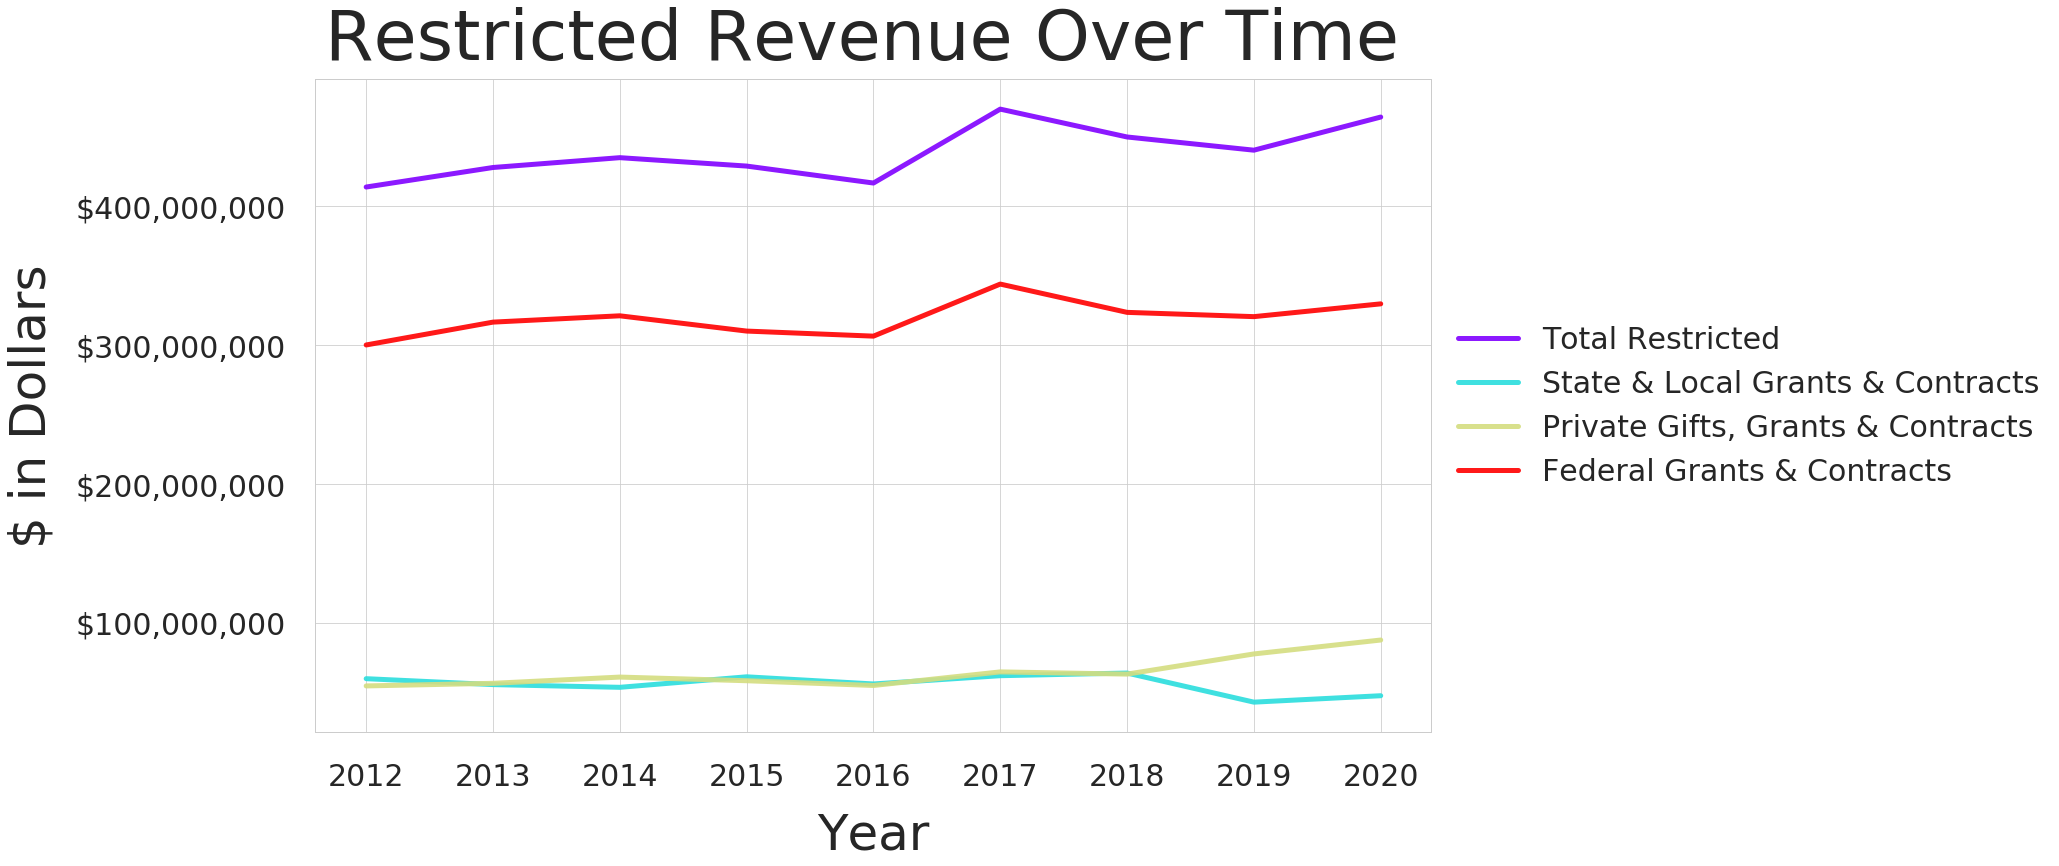

In [28]:
restricted_dict = {k:features[k] for k in restricted if k in features}

figsize = (20, 12)
title = "Restricted Revenue Over Time "
plot_line_graphs_expenses(restricted_dict, title, figsize)

It seems like federal grants and contracts make the most revenue in restricted revenue. For example, at the Joint Quantum Institute (a quantum computing research group at UMD), some labs are sponsored by the U.S. Army Research lab.

# salary_increases

The salary_increases dataframe contains data on how much salaries have been generally increasing from 1967 to 2019. This is percentage based and is based on the state cost of living adjusted percentage or 'State C.O.L.A. %' and the merit percentage 'Merit %' (which is like bonus compensation). These two percentages added up equal to the 'Total Increase %'. If you would like to learn more about how this dataframe was created, please click here: <a href="https://adharsh.github.io/Salary_Increases.html">https://adharsh.github.io/Salary_Increases.html</a>

In [29]:
salary_increases.loc[salary_increases["State C.O.L.A. %"] > 100, "State C.O.L.A. %"] = 0
salary_increases = salary_increases.drop(["Total Increase %"], 1)
salary_increases.tail()

,Year,State C.O.L.A. %,Merit %
4,1971,5.0,7.0
3,1970,8.0,6.0
2,1969,0.0,6.0
1,1968,12.0,5.0
0,1967,0.0,0.0


In [30]:
# Compute the running sums of salary increase and cost of living over the years.
merit_pct = np.cumsum(np.flipud(np.array(salary_increases["Merit %"])))
state_cola = np.cumsum(np.flipud(np.array(salary_increases["State C.O.L.A. %"])))

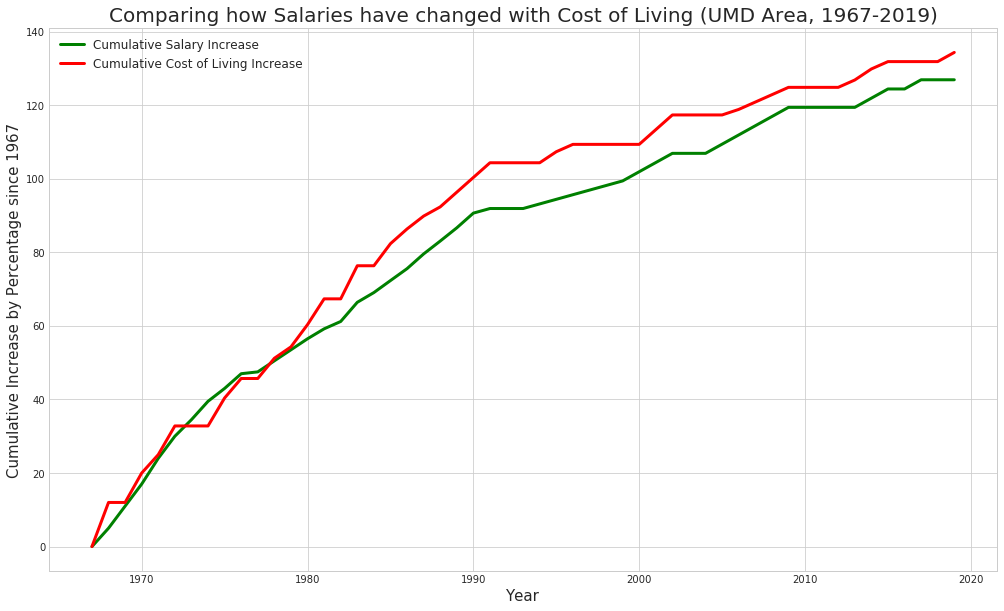

In [31]:
# Plot salary increase vs. cost of living over the years.
figure(figsize=[17, 10])
plt.title("Comparing how Salaries have changed with Cost of Living (UMD Area, 1967-2019)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Cumulative Increase by Percentage since 1967", fontsize=15)

years = [i for i in range(1967, 2020)]

plt.plot(years, merit_pct, color="green", linewidth=3, label="Cumulative Salary Increase");
plt.plot(years, state_cola, color="red", linewidth=3, label="Cumulative Cost of Living Increase");

plt.legend(loc="upper left", prop = {"size" : 12});

# salaries

The salaries dataframe contains data on the salary for each faculty member from 2013 to 2019. Each 'Employee' has a job 'Title' and belongs to a 'Divison', which is part of a 'Department'. This 'Department' is part of a 'School'. The 'School' is just the first four or five characters of the 'Department' string. If you would like to learn more about how this dataframe was created, please click here: <a href="https://adharsh.github.io/Salaries.html">https://adharsh.github.io/Salaries.html</a>

In [113]:
salaries = pd.read_pickle('salaries')

In [114]:
salaries.loc[salaries['Employee'] == 'Abed, Eyad H']

,Year,School,Department,Division,Title,Employee,Salary
0,2013,ENGR,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Prof,"Abed, Eyad H",216648.00
12492,2014,ENGR,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Prof,"Abed, Eyad H",226494.65
24966,2015,ENGR,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Prof,"Abed, Eyad H",233912.35
35178,2016,ENGR,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Prof,"Abed, Eyad H",233912.35
45293,2017,ENGR,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Prof,"Abed, Eyad H",235783.65
55594,2018,ENGR,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Prof,"Abed, Eyad H",235783.65
66033,2019,ENGR,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Prof,"Abed, Eyad H",240499.32


In [88]:
salaries.head(10)

,Year,School,Department,Division,Title,Employee,Salary
0,2013,ENGR,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Prof,"Abed, Eyad H",216648.00
1,2013,ENGR,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,Assoc Prof,"Abshire, Pamela A.",82872.96
2,2013,ENGR,ENGR-Institute for Systems Research,A. James Clark School of Engineering,Assoc Prof,"Abshire, Pamela A.",55149.36
3,2013,ENGR,ENGR-Fischell Department of Bioengineering,A. James Clark School of Engineering,Res Assoc Prof,"Abts, Leigh R",126334.14
4,2013,ENGR,ENGR-Continuing & Distance Learning in Engr,A. James Clark School of Engineering,Engineer,"Adams, Douglas J",64260.00
5,2013,ENGR,ENGR-Materials Science & Engineering,A. James Clark School of Engineering,Coordinator,"Adams, Vincent G.",83717.52
6,2013,ENGR,ENGR-A. James Clark School of Engineering,A. James Clark School of Engineering,Office Assistant,"Addo, Kofi Frimpong",10.20
7,2013,ENGR,ENGR-Chemical & Biomolecular Engineering,A. James Clark School of Engineering,Prof,"Adomaitis, Raymond A.",91638.84
8,2013,ENGR,ENGR-Institute for Systems Research,A. James Clark School of Engineering,Prof,"Adomaitis, Raymond A.",54758.70
9,2013,ENGR,ENGR-Civil & Enviromental Engr,A. James Clark School of Engineering,Prof,"Aggour, Mohamed Sherif",113814.32


For the following plots, no legend is provided (since it would be too long). Simply hover your mouse over the point (not the line but the point which intersects with the year) to get the hover text.

In [98]:
fig = px.line(salaries.groupby(['Year','Department']).sum().reset_index(), 
              x="Year", y="Salary", color="Department", hover_name="Department")

fig.update_layout(
    showlegend=False,
    title="Total Salaries for Each Department Over Time",
    xaxis_title="Year",
    yaxis_title="$ in Dollars",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="#000000"
    )
)

fig.show()

If the data is grouped by department, it looks like the physics and athletics departments are the most heavily funded. Interestingly, the Division of Administration & Finance is the next heavily funded department. However, a lot of these departments should be overlapping. For example, there are several unique CMNS departments because CMNS spans so many subjects. To combine these departments together, we can examine this graph by school, where CMNS would be a single line graph.

In [96]:
fig = px.line(salaries.groupby(['Year','School']).sum().reset_index(), 
              x="Year", y="Salary", color="School", hover_name="School")

fig.update_layout(
    showlegend=False,
    title="Total Salaries for Each School Over Time",
    xaxis_title="Year",
    yaxis_title="$ in Dollars",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="#000000"
    )
)

fig.show()

As expected, CMNS is the most funded school since it contains so many departments.

In [100]:
fig = px.line(salaries.groupby(['Year','School']).mean().reset_index(), 
              x="Year", y="Salary", color="School", hover_name="School")

fig.update_layout(
    showlegend=False,
    title="Mean Salaries for Each School Over Time",
    xaxis_title="Year",
    yaxis_title="$ in Dollars",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="#000000"
    )
)

fig.show()

Now at the individual level, it looks like the highest salaries for any professor of a department on average are from VPUR, BMGT, and PRES. So basically, administration and business professsors on average earn the most. However, the mean may not be a good metric since it's heavily influenced by outliers. The following graph is the same graph as above but using median. 

In [106]:
fig = px.line(salaries.groupby(['Year','Department']).max().reset_index(), 
              x="Year", y="Salary", color="Department", hover_name="Employee")

fig.update_layout(
    showlegend=False,
    title="Max Salary for Each Department Over Time",
    xaxis_title="Year",
    yaxis_title="$ in Dollars",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="#000000"
    )
)

fig.show()

Now let's go even more specific and revert back to departments. Let's find out the max salary for each department over time. As you can see, each data point for a single line can represent a different employee. However, the line will still be in the same department. The top departments here are administration and athletics and it's also interesting to note how the athletics department skyrockets to nearly 900k a year.

<hr>
<center><h1> Corrorboration with Multiple DataFrames and Machine Learing</h1></center>

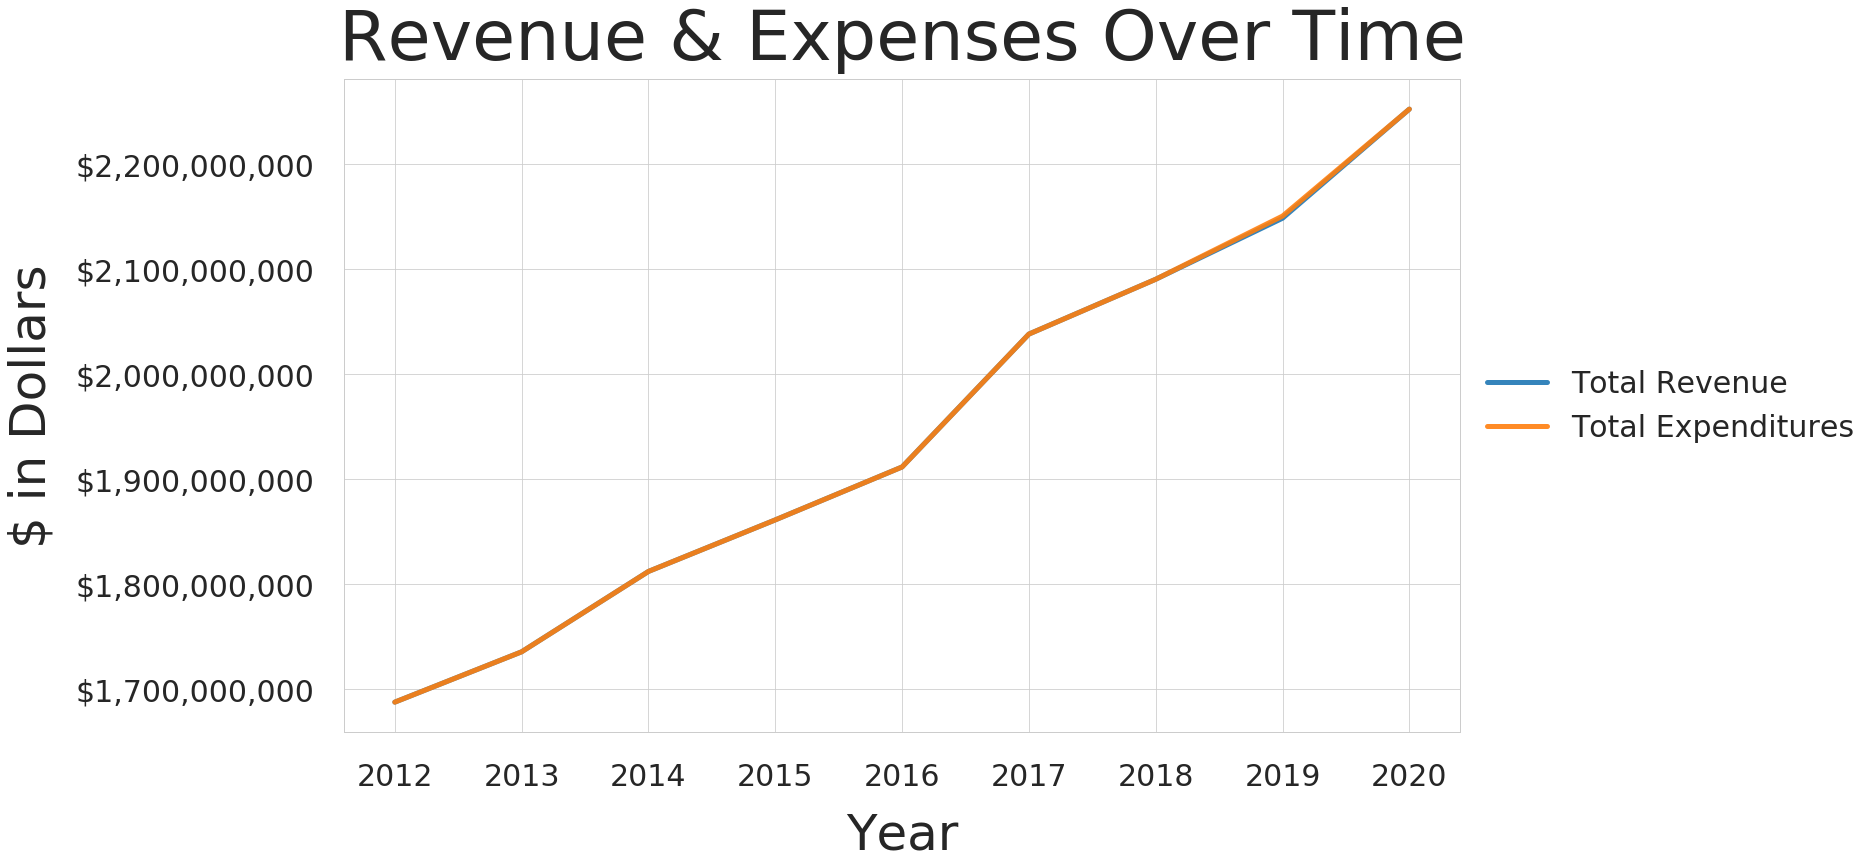

In [39]:
figsize = (20, 12)
plt.style.use('seaborn-whitegrid')
_, ax = fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
color=iter(cm.rainbow(np.linspace(0, 1, len(features))))

features = {'Total Revenue' : total_revenue, 'Total Expenditures' : total_expenditures}

for feature in features:
    plt.plot(list(range(2012, 2021)), features[feature], marker='', linewidth=5, alpha=0.9, label=feature)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.tick_params(axis='both', which='major', pad=30)

plt.title('Revenue & Expenses Over Time', fontsize=70, pad=20)
plt.xlabel("Year", fontsize=50, labelpad=20)
plt.ylabel("$ in Dollars", fontsize=50, labelpad=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
plt.show()

The revenue and the expenses (from those respective dataframes) are practically the same, which implies their difference is zero. This means that all the gross revenue is distributed evenly back to the expenses. For example, the extra revenues would go into university projects like building more campus dorms or redistributed as scholarships for students or grants for professors which would count as an expense.

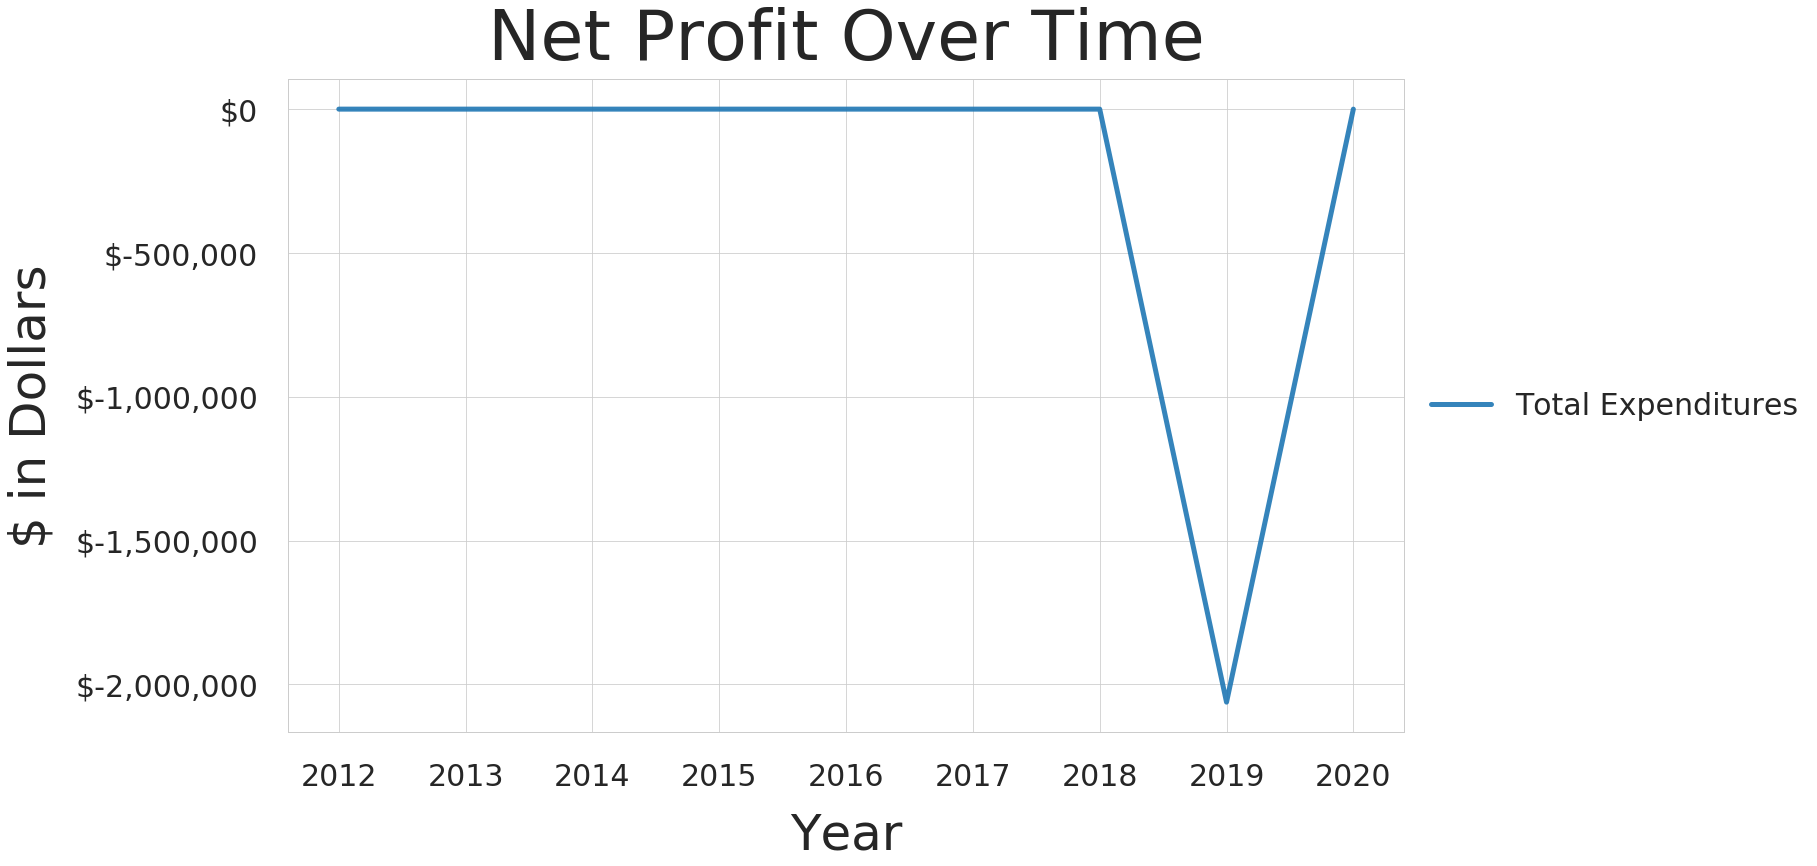

In [40]:
figsize = (20, 12)
plt.style.use('seaborn-whitegrid')
_, ax = fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
color=iter(cm.rainbow(np.linspace(0, 1, len(features))))

net_profit = [a_i - b_i for a_i, b_i in zip(total_revenue, total_expenditures)]
plt.plot(list(range(2012, 2021)), net_profit, marker='', linewidth=5, alpha=0.9, label=feature)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.tick_params(axis='both', which='major', pad=30)

plt.title('Net Profit Over Time', fontsize=70, pad=20)
plt.xlabel("Year", fontsize=50, labelpad=20)
plt.ylabel("$ in Dollars", fontsize=50, labelpad=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
plt.show()

Since we thought that the difference between revenues and expenses is zero, here is the plot of the difference. It seems like it's not zero in the year of 2019. Maybe this is a data recording error since at the time this was written, the year 2019 had not passed yet. Therefore, we can assume that the difference would actually be zero and our inferences above still hold true.

### Salaries vs Expenses

In [110]:
total_salaries = list(salaries.groupby(by='Year').sum()['Salary'].values)
total_expenses = list(expenses.loc[(expenses['Group Type'] == 'Program') & (expenses['Group'] == 'Total Expenditures')].sort_values(by='Year', ascending=True)[1:-1]['Total Expenditure Amount'].values)

categories = list(expenses.loc[expenses['Group Type'] == 'Category']['Group'].unique())

salaries_fringes = list(expenses.loc[expenses['Group'] == 'Salaries & Fringes'].sort_values(by='Year', ascending=True)[1:-1]['Total Expenditure Amount'].values)
fringes = [a_i - b_i for a_i, b_i in zip(salaries_fringes, total_salaries)]
# fringes = [a_i - b_i for a_i, b_i in zip(total_salaries, salaries_fringes)]

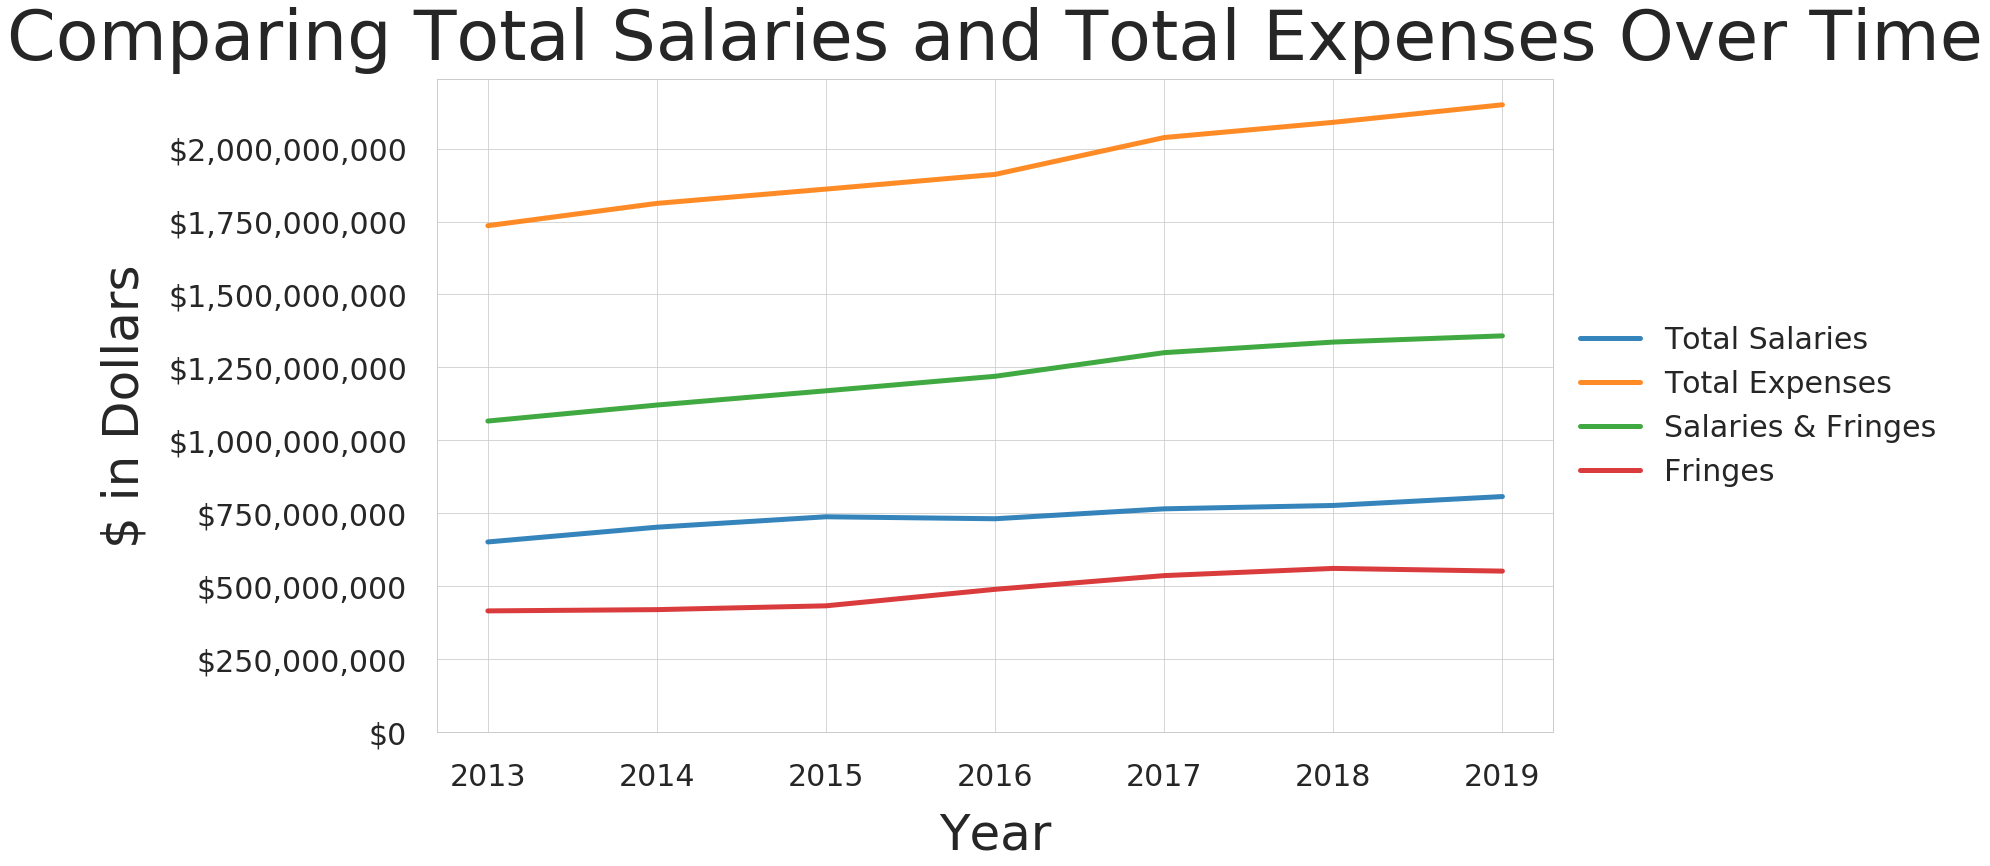

In [112]:
figsize = (20, 12)
plt.style.use('seaborn-whitegrid')
_, ax = fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
color=iter(cm.rainbow(np.linspace(0, 1, len(list(range(2013, 2019))))))

plt.plot(list(range(2013, 2019 + 1)), total_salaries, marker='', linewidth=5, alpha=0.9, label='Total Salaries')
plt.plot(list(range(2013, 2019 + 1)), total_expenses, marker='', linewidth=5, alpha=0.9, label='Total Expenses')
plt.plot(list(range(2013, 2019 + 1)), salaries_fringes, marker='', linewidth=5, alpha=0.9, label='Salaries & Fringes')
plt.plot(list(range(2013, 2019 + 1)), fringes, marker='', linewidth=5, alpha=0.9, label='Fringes')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.tick_params(axis='both', which='major', pad=30)
ax.set_ylim(ymin=0)

plt.title('Comparing Total Salaries and Total Expenses Over Time', fontsize=70, pad=20)
plt.xlabel("Year", fontsize=50, labelpad=20)
plt.ylabel("$ in Dollars", fontsize=50, labelpad=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
plt.show()

We figured out how much money was spent for 'Salaries and Fringes' from the expenses dataframe and we can figure out the total salaries of all the faculty per year from the salaries dataframe. The result is shown above. 'Total Salaries' is the sum of all the salaries per year from the salaries dataframe. 'Salaries and Fringes' and 'Total Expenses' are from the expenses dataframe. 'Fringes' is the result of subtracting 'Total Salaries' from 'Salaries and Fringes'. As you can see from the above plot, 'Fringes' (or benefit compensation) account for nearly $\$500k$ a year.

# Machine Learning

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [44]:
num_future_years = 10

pred_tuition_fees = copy.deepcopy(tuition_fees)
start_year = int(tuition_fees['Year'].max()) + 1
tuition_slopes = {}
cols = list(tuition_fees.columns)

for yr in range(start_year, start_year + num_future_years + 1):
    pred_tuition_fees.append({'Year' : str(yr)}, ignore_index=True)

for feature in cols[1:]:
    X = tuition_fees[cols[0]].values.reshape(-1, 1)
    Y = tuition_fees[feature].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, Y)
    tuition_slopes[feature] = reg.coef_[0][0]
    
    for yr in range(start_year, start_year + num_future_years + 1):
        pred_tuition_fees.loc[pred_tuition_fees['Year'] == str(yr), feature] = reg.predict(X)[0][0]

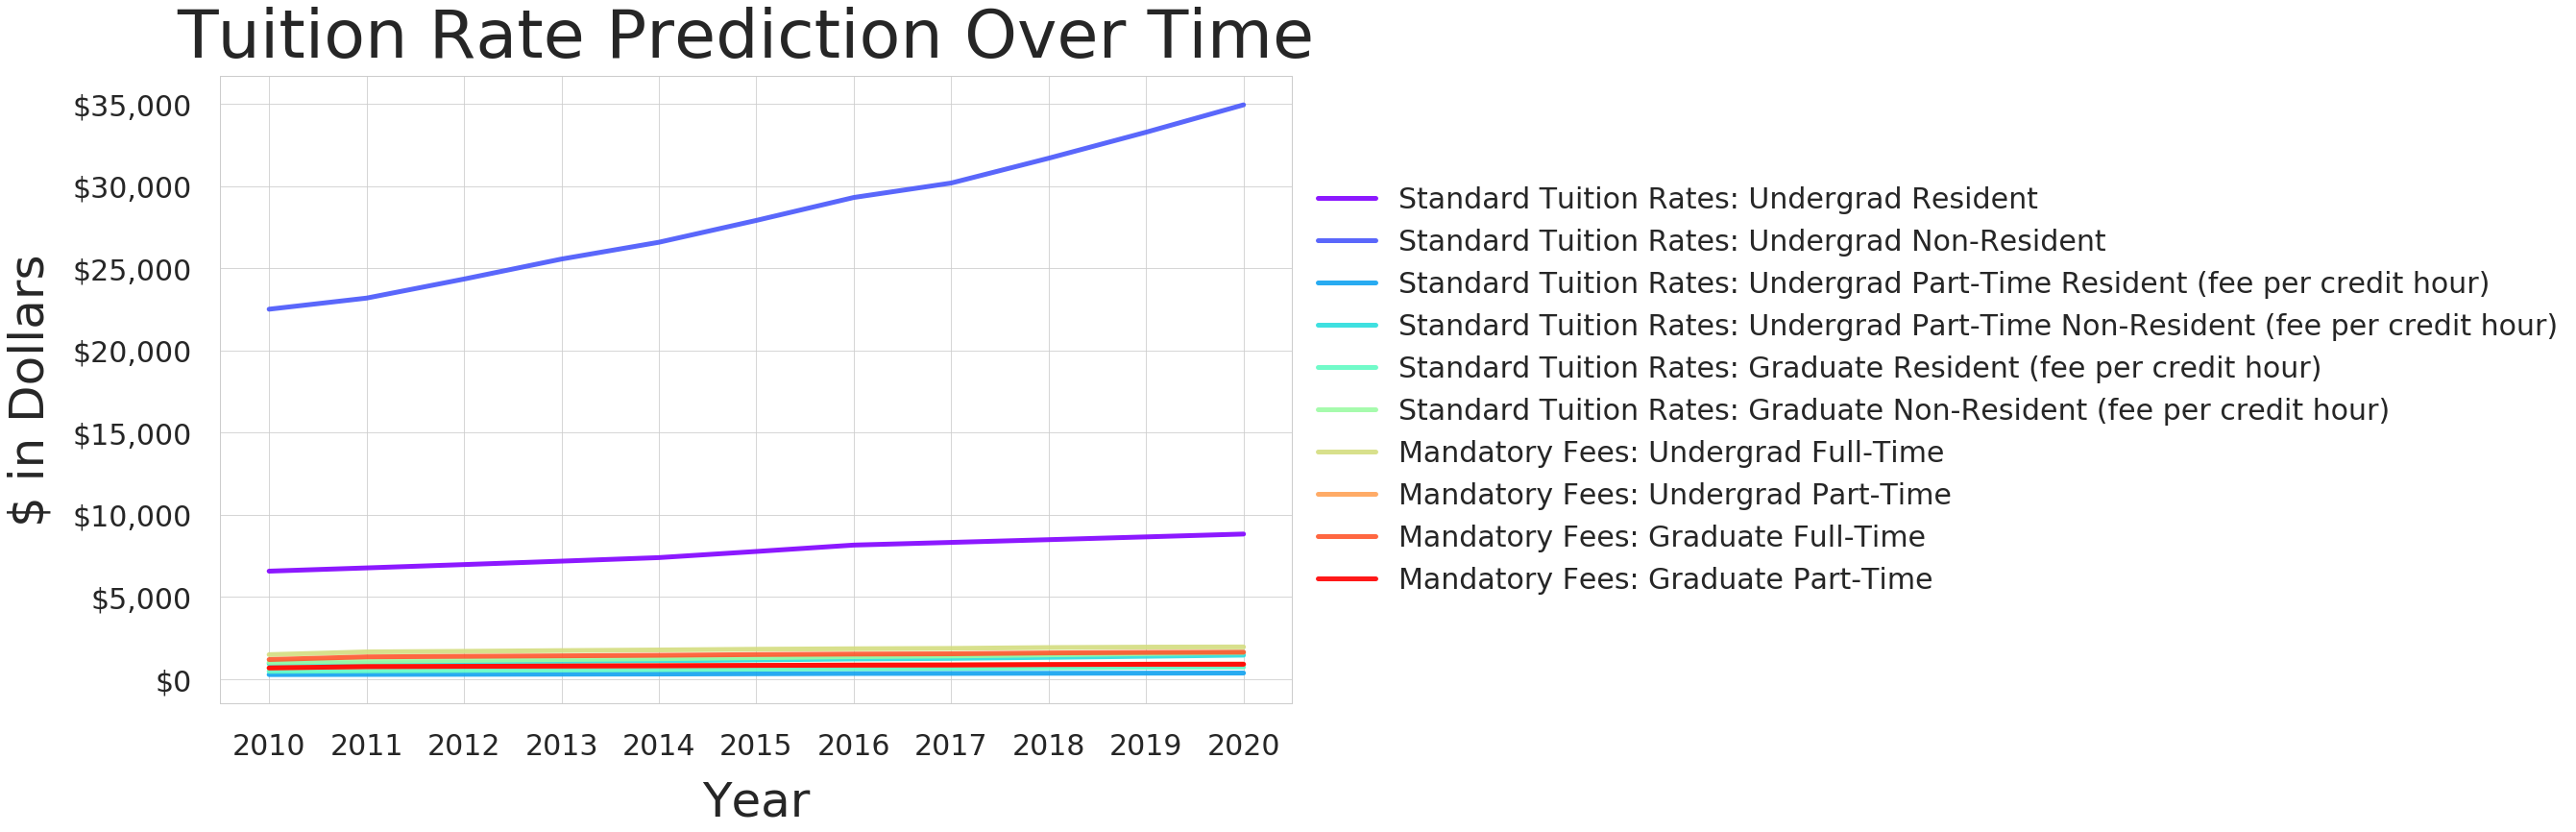

In [45]:
features = {k:pred_tuition_fees[k] for k in cols[1:] if k in pred_tuition_fees}

figsize = (20, 12)
title = "Tuition Rate Prediction Over Time "
plot_line_graphs_tuition(pred_tuition_fees, features, title, figsize)

In [46]:
pickle.dump(tuition_slopes, open('finds/tuition_slopes.pkl', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
tuition_slopes

{'Standard Tuition Rates: Undergrad Resident': 240.26363636363644,
 'Standard Tuition Rates: Undergrad Non-Resident': 1241.5272727272734,
 'Standard Tuition Rates: Undergrad Part-Time Resident (fee per credit hour)': 9.972727272727276,
 'Standard Tuition Rates: Undergrad Part-Time Non-Resident (fee per credit hour)': 51.76363636363638,
 'Standard Tuition Rates: Graduate Resident (fee per credit hour)': 26.372727272727285,
 'Standard Tuition Rates: Graduate Non-Resident (fee per credit hour)': 59.24545454545457,
 'Mandatory Fees: Undergrad Full-Time': 41.181818181818194,
 'Mandatory Fees: Undergrad Part-Time': 20.481818181818188,
 'Mandatory Fees: Graduate Full-Time': 38.7,
 'Mandatory Fees: Graduate Part-Time': 19.97272727272728}

Linear regression has been performed on each feature shown above to see the average increase in dollars per year. As shown from the above plot and dictionary output, out-of-state students pay a lot! On average, an undergraduate out-of-state student's tuition increases by $\$1,241.53$ a year whereas an in-state undergraduate student's tuition increases by only $\$240.26$ a year! Similar conclusions can be made with graduate students as well. It's very striking how much UMD charges out-of-state students. It seems like they get the most money out of out-of-state undergraduate students more than anyone else.

In [115]:
num_future_years = 10

pred_salaries = copy.deepcopy(salaries)
start_year = int(tuition_fees['Year'].max()) + 1
salary_slopes = {}

# for yr in range(start_year, start_year + num_future_years + 1):
#     pred_salaries.append({'Year' : str(yr)}, ignore_index=True)

for feature in salaries['Employee'].unique():
    X = salaries.loc[salaries['Employee'] == feature]['Year'].values.reshape(-1, 1)
    Y = salaries.loc[salaries['Employee'] == feature]['Salary'].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, Y)
    salary_slopes[feature] = reg.coef_[0][0]
#     for yr in range(start_year, start_year + num_future_years + 1):
#         pred_tuition_fees.loc[pred_tuition_fees['Year'] == str(yr), feature] = reg.predict(X)[0][0]

In [116]:
pickle.dump(salary_slopes, open('finds/salary_slopes.pkl', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [117]:
{k: salary_slopes[k] for k in list(salary_slopes)[:10]}

{'Abed, Eyad H': 3285.8307142857134,
 'Abshire, Pamela A.': 8568.54312326228,
 'Abts, Leigh R': 646.8983928571447,
 'Adams, Douglas J': 1736.5589285714286,
 'Adams, Vincent G.': 3624.349999999998,
 'Addo, Kofi Frimpong': 0.0,
 'Adomaitis, Raymond A.': -495.03232142856973,
 'Aggour, Mohamed Sherif': 8788.578412698413,
 'Agustin, Carol-Ann Wood': 1846.4517142857137,
 'Ahdi, Farshad': 0.0}

In [118]:
len(salaries['Employee'].unique())

22076

The code above performs linear regression on every faculty member that has existed from 2013 to 2019 to find their average increase in salary in dollars per year. As shown by the number directly above, this is about 2,2076 linear regressions, and the code might take some time to run. 